<a href="https://colab.research.google.com/github/tirth5828/We-Showed-Up/blob/main/Risper_Representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import csv
from datetime import datetime

In [3]:
# prompt: read txt file into string

with open('/content/31Oct2023-messages.txt', 'r') as f:
    data = f.read()


In [4]:

# Split the input data into lines
lines = data.strip().split('\n')
len(lines)

30042

In [5]:
import csv
from io import StringIO


# Using StringIO to simulate file-like object
data_file = StringIO(data)

# Parse each line and extract values
rows = []
fieldnames = set()
for line in data_file:
    parts = line.split()
    row = {}
    row['timestamp'] = parts[0] + ' ' + parts[1]
    for item in parts[2:]:
      try:
        key, value = item.split("=")
        row[key] = value.strip('"')
        fieldnames.add(key)  # Add the key to the set of fieldnames

      except:
        pass
    rows.append(row)

# Write to CSV
csv_file_path = 'output.csv'
with open(csv_file_path, 'w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    # Write header
    writer.writeheader()

    # Write rows
    for row in rows:
        writer.writerow(row)

print(f"CSV file created: {csv_file_path}")


CSV file created: output.csv


In [6]:
import pandas as pd

df = pd.read_csv("/content/output.csv")

<ipython-input-6-a47918203511>:3: DtypeWarning: Columns (11,52,59) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/output.csv")


In [7]:
df['level'].value_counts()

notice     29933
error         67
warning       42
Name: level, dtype: int64

In [8]:
df.shape

(30042, 62)

In [9]:
! pip install ripser


Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


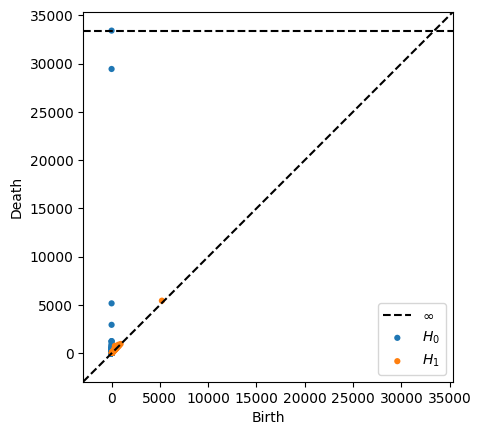

In [10]:
import pandas as pd
from ripser import Rips
import numpy as np

# Assuming your DataFrame is named df
# Fill NaN values with 0
df = df.fillna(0).head(1000)

# Select relevant columns for analysis
columns_for_analysis = ['wanin', 'lanin', 'lanout', 'wanout', 'sentbyte', 'rcvdbyte', 'sentpkt', 'rcvdpkt']

# Perform TDA analysis
X = df[columns_for_analysis].to_numpy()
rips = Rips()
diagrams = rips.fit_transform(X)

# Plot persistence diagrams
rips.plot(diagrams)

In [11]:
diagrams

[array([[0.00000000e+00, 1.00000000e+00],
        [0.00000000e+00, 1.00000000e+00],
        [0.00000000e+00, 1.00000000e+00],
        ...,
        [0.00000000e+00, 5.17110596e+03],
        [0.00000000e+00, 2.94382852e+04],
        [0.00000000e+00,            inf]]),
 array([[5208.19189453, 5447.80078125],
        [ 929.49554443,  963.5065918 ],
        [ 788.82763672,  789.35736084],
        [ 695.44952393,  880.88305664],
        [ 644.81781006,  649.33734131],
        [ 641.54034424,  702.67132568],
        [ 576.13018799,  634.67077637],
        [ 555.09185791,  737.86920166],
        [ 509.82644653,  522.07659912],
        [ 482.13275146,  700.50982666],
        [ 474.64303589,  492.13412476],
        [ 443.27868652,  579.2555542 ],
        [ 435.1930542 ,  475.94326782],
        [ 427.22360229,  431.74182129],
        [ 418.5821228 ,  490.65975952],
        [ 404.93084717,  412.32269287],
        [ 403.06945801,  442.68499756],
        [ 400.83163452,  406.28439331],
        [ 399